In [74]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\social\\sn_ads.csv')

In [75]:
head(df)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [76]:
str(df)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [77]:
library(dplyr)
df=select(df,-User.ID)

In [78]:
df$Purchased=factor(df$Purchased)

In [79]:
str(df)

'data.frame':	400 obs. of  4 variables:
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


# EDA

In [26]:
library(ggplot2)

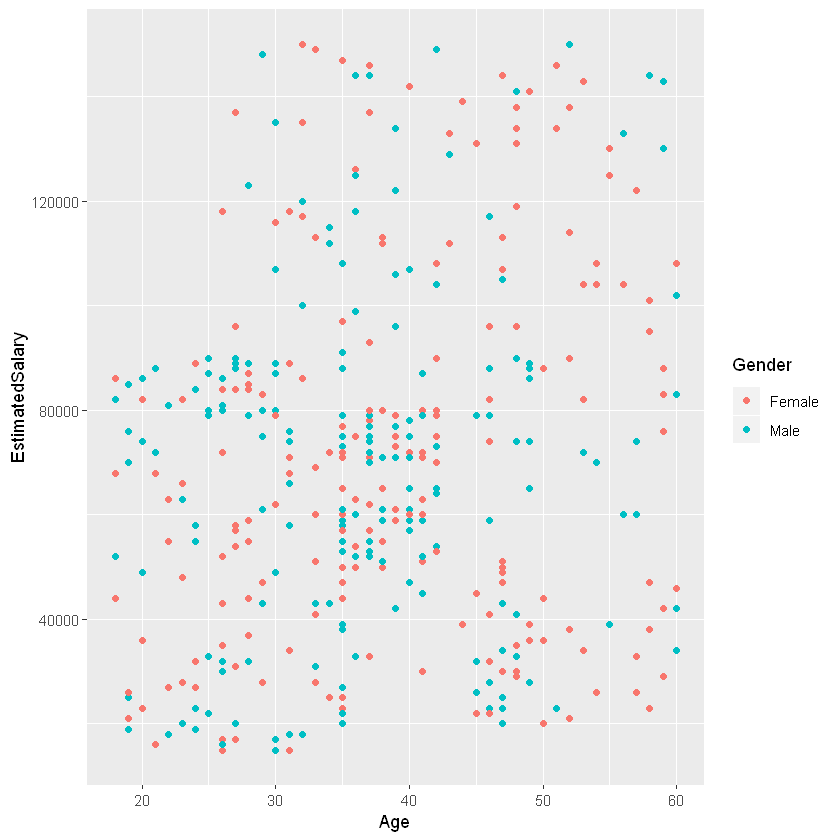

In [27]:
ggplot(df,aes(Age,EstimatedSalary)) + geom_point(aes(color=Gender))

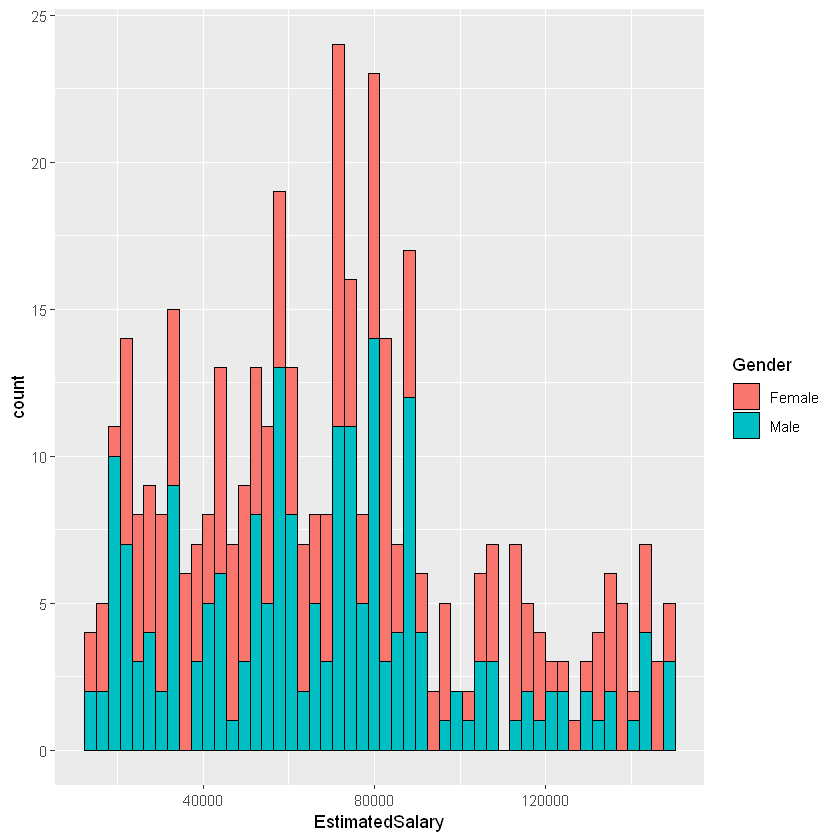

In [14]:
ggplot(df,aes(EstimatedSalary)) + geom_histogram(aes(fill=Gender),color='black',bins=50)

## Splitting Data

In [80]:
library(caTools)

set.seed(101) 

sample = sample.split(df$Purchased, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

## APPLYING DECISION TREE MODEL

In [81]:
library(rpart)

In [82]:
tree <- rpart(Purchased ~.,method='class',data = train)

In [83]:
tree.preds <- predict(tree,test)

In [84]:
head(tree.preds)

,0,1
3,0.9878788,0.01212121
8,0.2051282,0.79487179
12,0.9878788,0.01212121
14,0.9878788,0.01212121
15,0.9878788,0.01212121
20,0.1184211,0.88157895


In [85]:
tree.preds=as.data.frame(tree.preds)

joiner=function(x){
    if(x>=0.5){
        return(1)
    }
    else{
        return(0)
    }
}

In [86]:
tree.preds$Purchased <- sapply(tree.preds$"1",joiner)

In [87]:
head(tree.preds)

,0,1,Purchased
3,0.9878788,0.01212121,0
8,0.2051282,0.79487179,1
12,0.9878788,0.01212121,0
14,0.9878788,0.01212121,0
15,0.9878788,0.01212121,0
20,0.1184211,0.88157895,1


In [88]:
table(tree.preds$Purchased,test$Purchased)

   
     0  1
  0 68  6
  1  9 37

In [89]:
TN=68
FN=6
FP=9
TP=37

In [90]:
ACC=(TP+TN)/(TN+FN+FP+TP)
ACC

[1] 0.875

In [91]:
ERR=(FP+FN)/(TN+FN+FP+TP)
ERR

[1] 0.125

## Decision Tree

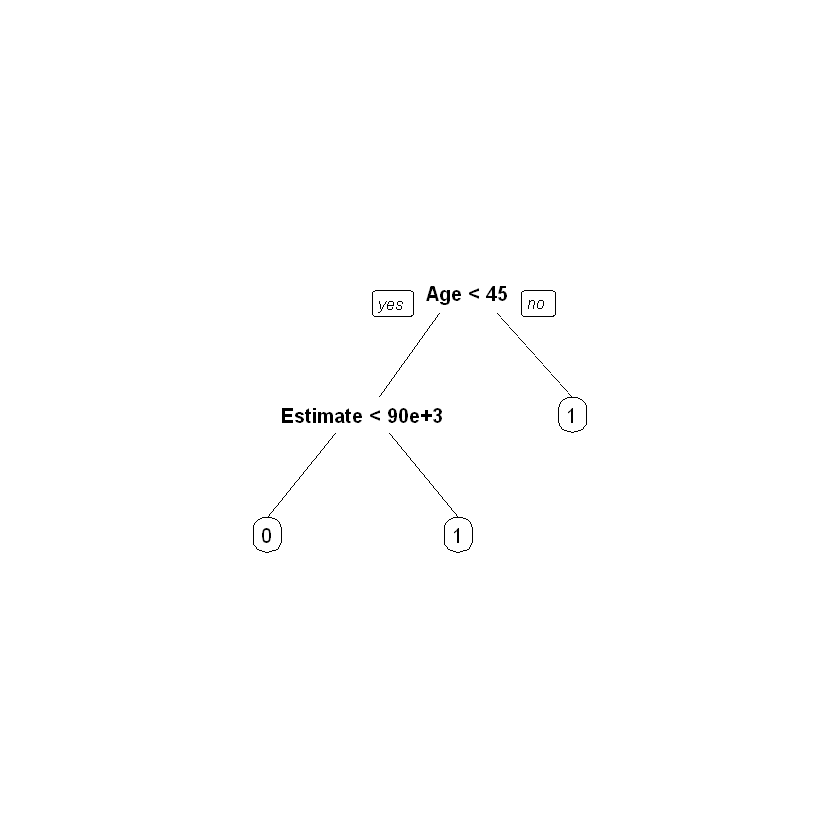

In [92]:
library(rpart.plot)
prp(tree)

## AUC-ROC Curve

Setting levels: control = 0, case = 1
Setting direction: controls < cases


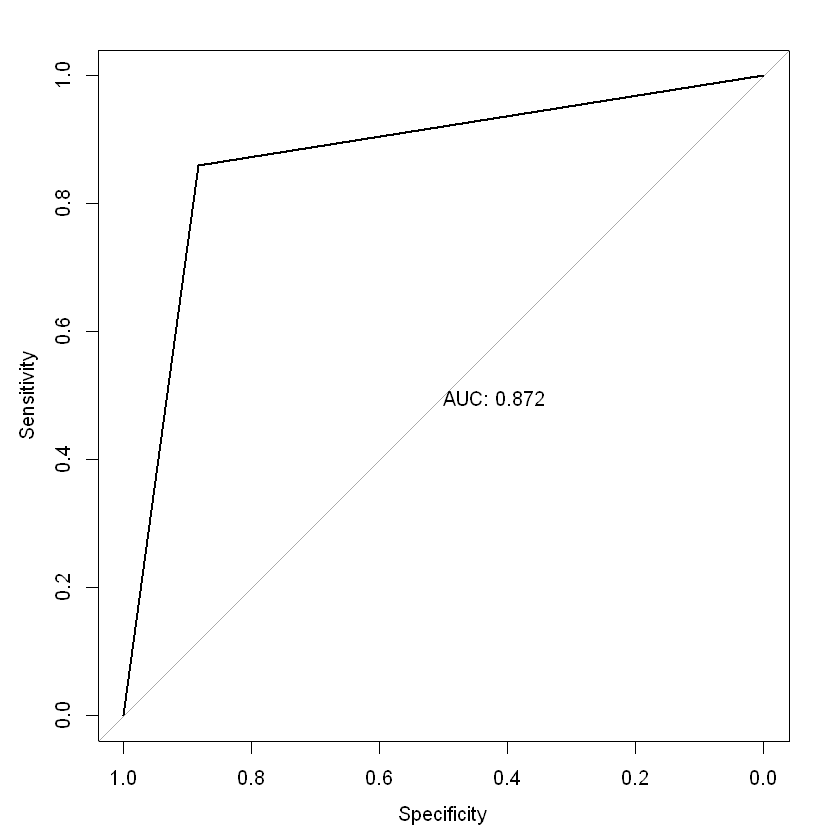

In [93]:
library(pROC)
test_roc=roc(test$Purchased~tree.preds$Purchased,plot=TRUE,print.auc=TRUE)

## APPLYING RANDOM FOREST MODEL

In [94]:
library(randomForest)

In [95]:
rf.model=randomForest(Purchased~.,data=train,importance=TRUE)

In [146]:
p=predict(rf.model,test)

In [97]:
table(p,test$Purchased)

   
p    0  1
  0 71 10
  1  6 33

In [98]:
TN=71
FN=10
FP=6
TP=33

In [99]:
ACC=(TP+TN)/(TN+FN+FP+TP)
ACC

[1] 0.8666667

In [100]:
ERR=(FP+FN)/(TN+FN+FP+TP)
ERR

[1] 0.1333333

## AUC-ROC Curve

In [148]:
p=as.numeric(p)
test$Purchased=as.numeric(test$Purchased)

Setting levels: control = 1, case = 2
Setting direction: controls < cases


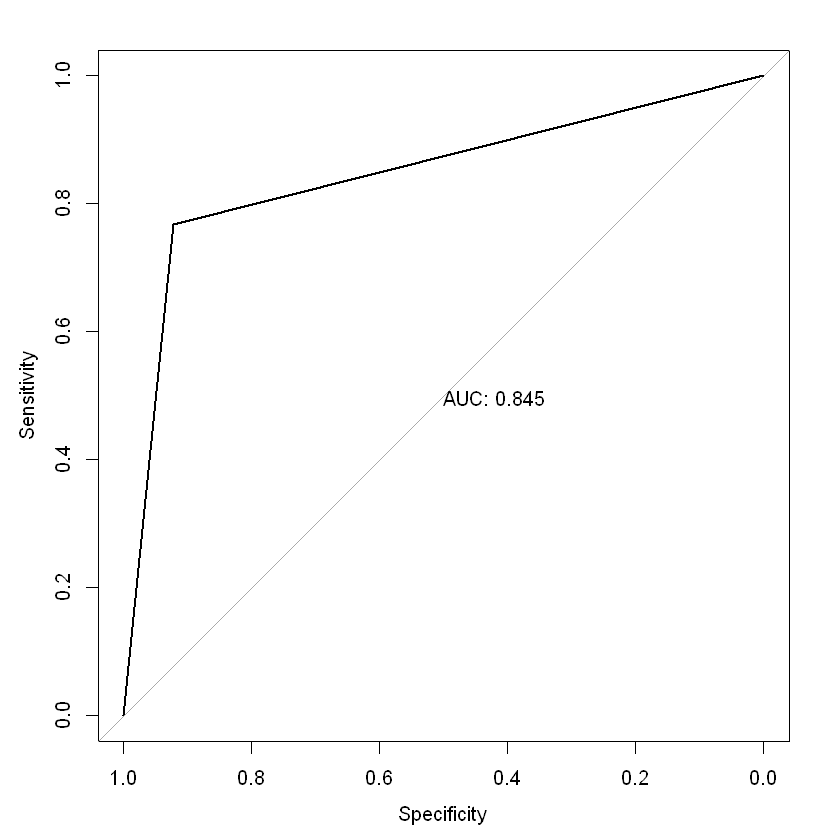

In [152]:
test_roc=roc(test$Purchased~p,plot=TRUE,print.auc=TRUE)